### Ефимова Василиса (4ИВТ)
#### Практическая работа № 3
#### Предсказание оттока сотрудников

## Загрузка библиотек


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score # метрики качества

## Загрузка данных

In [ ]:
%%capture
!wget https://www.dropbox.com/s/jaea4smqjbmslsb/training_data.csv
!wget https://www.dropbox.com/s/y1i45d72k9byzak/test_data.csv

In [ ]:
training_data = pd.read_csv('training_data.csv')
training_data.sample(10, random_state=123)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1930,45,Non-Travel,Sales,2,3,Medical,Female,Sales Executive,Married,66440,1.0,12,8,0,9.0,3,9,0,8,0
909,35,Travel_Rarely,Research & Development,9,3,Life Sciences,Male,Manager,Divorced,173990,6.0,12,8,0,7.0,3,2,2,2,1
222,30,Travel_Frequently,Research & Development,9,3,Other,Male,Healthcare Representative,Married,68250,1.0,14,8,0,1.0,2,1,0,0,1
2307,33,Travel_Rarely,Research & Development,9,3,Medical,Female,Manufacturing Director,Married,28990,1.0,17,8,0,15.0,3,15,5,7,0
576,34,Travel_Rarely,Sales,1,1,Marketing,Female,Laboratory Technician,Married,24760,1.0,19,8,0,6.0,2,6,1,3,0
1984,56,Travel_Frequently,Research & Development,1,2,Life Sciences,Female,Manufacturing Director,Married,52280,2.0,11,8,0,18.0,4,5,0,3,0
2984,28,Travel_Rarely,Research & Development,9,3,Medical,Male,Sales Representative,Single,46480,0.0,23,8,2,9.0,2,8,0,7,0
2942,32,Travel_Frequently,Research & Development,17,4,Other,Male,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,0
43,18,Travel_Rarely,Sales,7,3,Life Sciences,Male,Research Scientist,Single,38120,1.0,15,8,0,0.0,3,0,0,0,0
2880,38,Travel_Rarely,Sales,8,2,Marketing,Male,Research Scientist,Married,49300,9.0,14,8,0,14.0,0,1,0,0,0


## Упражнение

In [ ]:
# возраст сотрудника (Age) не больше 35 и не меньше 25, сотрудник мужчина(Male) работает в отделе продаж (Sales). 
# проверить размерность полученной выборки
traning_data_mid_age_male_sales = training_data[(training_data['Age'] >= 25) & (training_data['Age'] <= 35)
                                                & (training_data['Gender'] == 'Male') & (training_data['JobRole'].str.find('Sales') >= 0)]
traning_data_mid_age_male_sales.shape
traning_data_mid_age_male_sales.sample(3)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
2974,31,Travel_Frequently,Research & Development,9,4,Medical,Male,Sales Executive,Divorced,46840,1.0,16,8,1,2.0,4,2,2,2,0
843,32,Travel_Rarely,Research & Development,22,4,Medical,Male,Sales Executive,Married,29730,3.0,22,8,0,12.0,0,7,2,5,0
179,30,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,Sales Executive,Single,48500,0.0,12,8,1,4.0,4,3,1,2,0


## Общая статистика по данным

In [ ]:
# для удобства результат транспонируется
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3308.0,36.879383,9.146506,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,3308.0,9.201935,8.078147,1.0,2.0,7.0,14.0,29.0
Education,3308.0,2.918380,1.024933,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,3308.0,64594.903265,46744.260986,10090.0,29040.0,49070.0,83210.0,199990.0
NumCompaniesWorked,3293.0,2.703310,2.506197,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,3308.0,15.230048,3.672812,11.0,12.0,14.0,18.0,25.0
StandardHours,3308.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,3308.0,0.804716,0.860350,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,3301.0,11.283248,7.791024,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,3308.0,2.801995,1.290718,0.0,2.0,3.0,3.0,6.0


## Обработка данных перед обучением

In [ ]:
# общая информация о данных
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3308 non-null   int64  
 1   BusinessTravel           3308 non-null   object 
 2   Department               3308 non-null   object 
 3   DistanceFromHome         3308 non-null   int64  
 4   Education                3308 non-null   int64  
 5   EducationField           3308 non-null   object 
 6   Gender                   3308 non-null   object 
 7   JobRole                  3308 non-null   object 
 8   MaritalStatus            3308 non-null   object 
 9   MonthlyIncome            3308 non-null   int64  
 10  NumCompaniesWorked       3293 non-null   float64
 11  PercentSalaryHike        3308 non-null   int64  
 12  StandardHours            3308 non-null   int64  
 13  StockOptionLevel         3308 non-null   int64  
 14  TotalWorkingYears       

In [ ]:
# получение средних значений для заполенения пропусков
train_mean = training_data.mean()
train_mean

Age                           36.879383
DistanceFromHome               9.201935
Education                      2.918380
MonthlyIncome              64594.903265
NumCompaniesWorked             2.703310
PercentSalaryHike             15.230048
StandardHours                  8.000000
StockOptionLevel               0.804716
TotalWorkingYears             11.283248
TrainingTimesLastYear          2.801995
YearsAtCompany                 6.998791
YearsSinceLastPromotion        2.187122
YearsWithCurrManager           4.118501
Attrition                      0.160218
dtype: float64

In [ ]:
# заполнение пропусков средними значениями
training_data.fillna(train_mean, inplace=True)

# проверка заполнености
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3308 non-null   int64  
 1   BusinessTravel           3308 non-null   object 
 2   Department               3308 non-null   object 
 3   DistanceFromHome         3308 non-null   int64  
 4   Education                3308 non-null   int64  
 5   EducationField           3308 non-null   object 
 6   Gender                   3308 non-null   object 
 7   JobRole                  3308 non-null   object 
 8   MaritalStatus            3308 non-null   object 
 9   MonthlyIncome            3308 non-null   int64  
 10  NumCompaniesWorked       3308 non-null   float64
 11  PercentSalaryHike        3308 non-null   int64  
 12  StandardHours            3308 non-null   int64  
 13  StockOptionLevel         3308 non-null   int64  
 14  TotalWorkingYears       

## Упражнение

In [ ]:
# найти среднее значение переменной "Кол-во компаний, в которых работал сотрудник"
# (NumCompaniesWorked) среди тех сотрудников, у которых месячный доход 
# (MonthlyIncome) находится между 80000 и 120000
training_data[training_data['MonthlyIncome'].isin(range(80000, 120000))].NumCompaniesWorked.mean()

2.1995553338249967

In [ ]:
# или
training_data.loc[
  (training_data['MonthlyIncome'] >= 80000) 
  & (training_data['MonthlyIncome'] <= 120000), 
  'NumCompaniesWorked'
].mean()

2.1995553338249967

## Целевая переменная

In [ ]:
# целевая переменная - факт ухода или неухода сотрудника
target_variable_name = 'Attrition'
training_values = training_data[target_variable_name]

In [ ]:
# 1 - уволившиеся сотрудники
# 0 - оставшиеся сотрудники
training_values.value_counts()

0    2778
1     530
Name: Attrition, dtype: int64

In [ ]:
# отделение целевой переменной от входных данных для того, чтобы можно было 
# построить модель предсказания целевой переменной по входным
training_points = training_data.drop(target_variable_name, axis=1)
training_points.shape

(3308, 19)

## Упражнение

In [ ]:
colz = training_data.columns[:-1]
val_cou = []
for i in colz:
  val_cou.append((i, training_data[i].value_counts()))

In [ ]:
# вывод всех полученных подсчетов (нужно раскомментировать следующую строку)
# val_cou

## Загрузка и предобработка данных для тестирования

In [ ]:
test_data = pd.read_csv('test_data.csv')
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1102.0,37.057169,9.096386,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1102.0,9.164247,8.188807,1.0,2.0,7.0,14.0,29.0
Education,1102.0,2.896552,1.021213,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,1102.0,66333.330309,48028.087236,10090.0,29730.0,49385.0,84712.5,199990.0
NumCompaniesWorked,1098.0,2.669399,2.477794,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1102.0,15.147913,3.618613,11.0,12.0,14.0,18.0,25.0
StandardHours,1102.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,1102.0,0.761343,0.825476,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1100.0,11.270000,7.759277,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1102.0,2.791289,1.284292,0.0,2.0,3.0,3.0,6.0


In [ ]:
# заполнение средними значениями
test_data.fillna(train_mean, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1102 non-null   int64  
 1   BusinessTravel           1102 non-null   object 
 2   Department               1102 non-null   object 
 3   DistanceFromHome         1102 non-null   int64  
 4   Education                1102 non-null   int64  
 5   EducationField           1102 non-null   object 
 6   Gender                   1102 non-null   object 
 7   JobRole                  1102 non-null   object 
 8   MaritalStatus            1102 non-null   object 
 9   MonthlyIncome            1102 non-null   int64  
 10  NumCompaniesWorked       1102 non-null   float64
 11  PercentSalaryHike        1102 non-null   int64  
 12  StandardHours            1102 non-null   int64  
 13  StockOptionLevel         1102 non-null   int64  
 14  TotalWorkingYears       

In [ ]:
# целевая переменная аналогична, берем предыдущую переменную
test_values = test_data[target_variable_name]

In [ ]:
# отделяем входные данные от целевой переменной для построения модели
test_points = test_data.drop(target_variable_name, axis=1)

# проверка результата
test_points.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,32,Travel_Rarely,Sales,10,3,Marketing,Female,Human Resources,Married,30720,5.0,12,8,0,9.0,4,5,1,3
1,52,Travel_Frequently,Research & Development,1,1,Life Sciences,Male,Laboratory Technician,Married,50060,3.0,16,8,1,31.0,2,9,0,0
2,37,Travel_Rarely,Sales,24,2,Life Sciences,Female,Laboratory Technician,Divorced,42570,4.0,15,8,0,9.0,2,1,0,0
3,28,Travel_Rarely,Research & Development,21,4,Life Sciences,Female,Healthcare Representative,Divorced,25000,1.0,16,8,2,6.0,3,5,0,4
4,22,Travel_Rarely,Research & Development,2,2,Life Sciences,Male,Sales Representative,Married,11020,6.0,19,8,0,4.0,3,2,2,2


## Обработка текстовых переменных

In [ ]:
# определение категориальных признаков
text_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

### первый способ преобразования признаков к числам

In [ ]:
# создание таблицы с количество колонок по количеству признаков (соответствует признаку => 1, иначе 0)
dummies = pd.get_dummies(data=training_points, columns=text_features)
dummies.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,131160,1.0,11,8,0,1.0,6,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,10,1,41890,0.0,23,8,1,6.0,3,5,1,4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,17,4,193280,1.0,15,8,3,5.0,2,5,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,38,2,5,83210,3.0,11,8,3,13.0,5,8,7,5,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,32,10,1,23420,4.0,12,8,2,9.0,2,6,0,4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
training_points.shape

(3308, 19)

In [ ]:
dummies.shape

(3308, 39)

### второй способ преобразования признаков к числам

In [ ]:
# присвоение каждой категориии уникального номера и замена признаков соответствующими номерами
from sklearn.preprocessing import LabelEncoder
# прототип кодировщика
label_encoder = LabelEncoder()

In [ ]:
for col in text_features:
    training_points[col] = label_encoder.fit_transform(training_points[col]) + 1
    test_points[col] = label_encoder.transform(test_points[col]) + 1

training_points.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,3,3,6,2,2,1,1,2,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,2,2,10,1,2,1,7,3,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,2,2,17,4,5,2,8,2,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,1,2,2,5,2,2,2,2,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,3,2,10,1,4,2,8,3,23420,4.0,12,8,2,9.0,2,6,0,4


In [ ]:
training_points.shape

(3308, 19)

## Обучение модели на обучающей выборке

In [ ]:
from sklearn import linear_model
import xgboost as xgb

In [ ]:
# создание модели логистической регрессии
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# обучение модели логистической регрессии
logistic_regression_model.fit(training_points, training_values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# создание модели случайного леса с градиентным бустингом
xgboost_model = xgb.XGBClassifier(n_estimators=100)
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# обучение модели случайного леса с градиентным бустингом
xgboost_model.fit(training_points, training_values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Валидация модели на тестовой выборке

In [ ]:
# получение прогноза тестовых данных обеими моделями
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)
test_predictions_xgboost = xgboost_model.predict(test_points)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# точность прогноза
print(accuracy_score(test_values, test_predictions_logistic_regression))
print(accuracy_score(test_values, test_predictions_xgboost))

0.8357531760435571
0.8756805807622504


In [ ]:
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.8357531760435571


In [ ]:
pd.value_counts(test_predictions_logistic_regression)

0    1102
dtype: int64

In [ ]:
pd.value_counts(test_predictions_xgboost)

0    1052
1      50
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# таблица сопряженности для градиентного бустинга
xgboost_confusion_matrix = confusion_matrix(test_values, test_predictions_xgboost)
xgboost_confusion_matrix = pd.DataFrame(xgboost_confusion_matrix)

xgboost_confusion_matrix

,0,1
0,918,3
1,134,47


In [ ]:
# прогноз вероятности принадлежности классу
test_probabilities = xgboost_model.predict_proba(test_points)
test_probabilities[:5, :]

array([[0.85320413, 0.1467959 ],
       [0.89820313, 0.10179687],
       [0.90320766, 0.09679237],
       [0.94075686, 0.05924314],
       [0.632504  , 0.367496  ]], dtype=float32)

In [ ]:
# вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей
test_probabilities = test_probabilities[:, 1]

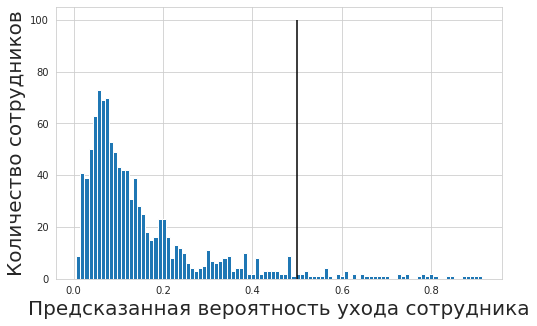

In [ ]:
# распределение предсказанной классификатором вероятности ухода сотрудника, метки 1
plt.figure(figsize=(8, 5))

plt.hist(test_probabilities, bins=100)
plt.vlines(0.5, 0, 100)

plt.xlabel('Предсказанная вероятность ухода сотрудника', fontsize=20)
plt.ylabel('Количество сотрудников', fontsize=20);

## Точность и полнота

In [ ]:
# матрица сопряженности для классификатора на основе случайного леса
confusion_matrix_xgboost = confusion_matrix(test_values, test_predictions_xgboost)
confusion_matrix_xgboost

array([[918,   3],
       [134,  47]])

In [ ]:
# выделение переменных в отдельные значения
TN, FP = confusion_matrix_xgboost[0, 0], confusion_matrix_xgboost[0, 1]
FN, TP = confusion_matrix_xgboost[1, 0], confusion_matrix_xgboost[1, 1]

In [ ]:
recall = TP / (TP + FN)
print("Полнота: %.2f%%" % (100 * recall))

Полнота: 25.97%


In [ ]:
precision = TP / (TP + FP)
print("Точность: %.2f%%" % (100 * precision))

Точность: 94.00%


In [ ]:
# получение точек кривой, аналогичной ROC-кривой
precision, recall, _ = precision_recall_curve(test_values, test_probabilities)

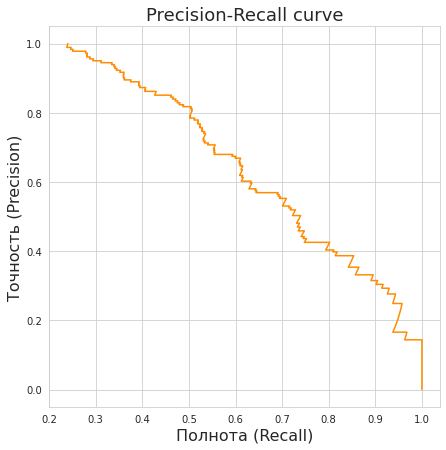

In [ ]:
plt.figure(figsize=(7, 7))

plt.plot(precision, recall, color='darkorange')

plt.title('Precision-Recall curve', fontsize=18)
plt.xlabel('Полнота (Recall)', fontsize=16)
plt.ylabel('Точность (Precision)', fontsize=16)

plt.show()

In [ ]:
pr_auc_value = average_precision_score(test_values, test_probabilities)
print("PR-AUC на тестовой выборке:", pr_auc_value) 

PR-AUC на тестовой выборке: 0.7102069442776826


In [ ]:
# ROC криявая классификатора
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, test_probabilities)

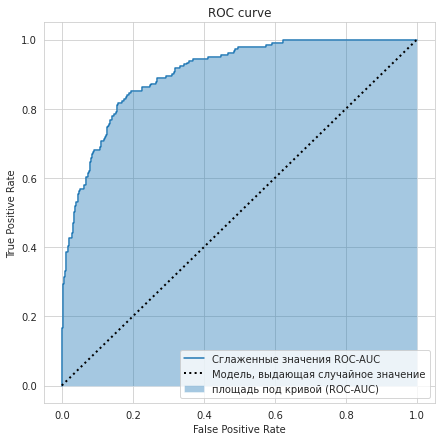

In [ ]:
# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_value = roc_auc_score(test_values, test_probabilities)
print("ROC-AUC на тестовой выборке:", roc_auc_value) 

ROC-AUC на тестовой выборке: 0.9031079597602895


In [ ]:
# просмотр важности признаков модели случайного леса с градиентным бустингом,
importances = xgboost_model.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
importances.shape

(19,)

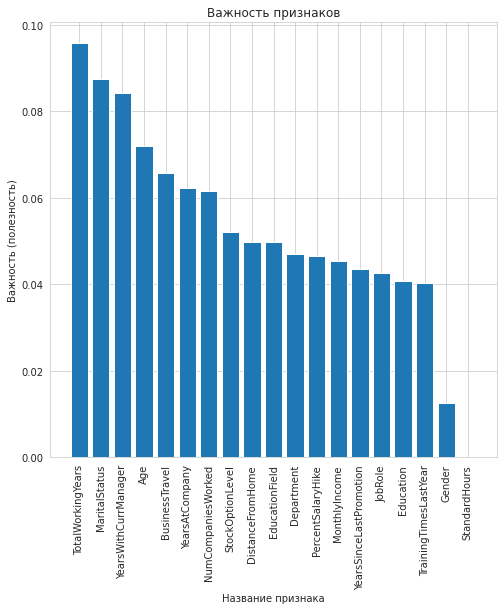

In [ ]:
plt.figure(figsize=(8, 8))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(training_points.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# просмотр важности признаков логичстической модели
importances = logistic_regression_model.coef_.flatten()
indices = np.argsort(importances)[::-1]

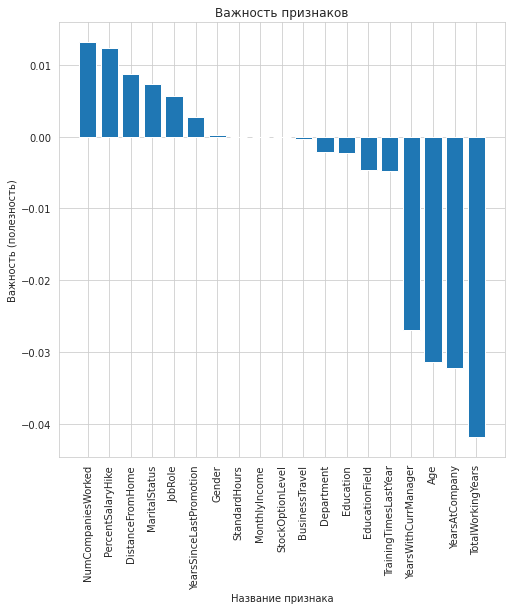

In [ ]:
plt.figure(figsize=(8, 8))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(training_points.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()